## 1. Using TensorDataset

### Mango and orange production for given environmental data
<img src='img/linear_regression_table.jpg' width="800">

In [1]:
import torch
import numpy as np

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')
inputs_tensor, targets_tensor = torch.Tensor(inputs), torch.Tensor(targets)



dataset = TensorDataset(inputs_tensor, targets_tensor) #tuple of inputs and targets
batch_size = 15
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# Batch Sampling
for input, target in train_loader:
    print(input.shape, target.shape)


torch.Size([15, 3]) torch.Size([15, 2])


# 2. Using Customized Dataset

In [3]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self,  inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input = self.inputs[idx]
        target = self.targets[idx]        
        return torch.FloatTensor(input), torch.FloatTensor(target)

batch_size = 15

dataset = CustomDataset(inputs, targets)
dataloader =  DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last = True)

for input, target in dataloader:
    print(input.shape, target.shape)


torch.Size([15, 3]) torch.Size([15, 2])


# 3. Using Saved Images

In [18]:
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import glob, os
from PIL import Image
import matplotlib.pyplot as plt


class CustomDataset(Dataset):
    def __init__(self, dir, transforms_=None, drop_last = True):
        self.transforms = transforms_
        #self.files = glob.glob(dir+'/*.png')
        self.files = os.listdir(dir)

    def __getitem__(self, index):
        #img = Image.open(self.files[index]).convert("RGB") # uint8. 0~255
        img = Image.open(os.path.join(dir, self.files[index])).convert("RGB") # uint8. 0~255. alpha channel is removed for png        
        img = self.transforms(img) # tensor. 0~1
        return img

    def __len__(self):
        return len(self.files)

dir = "data/cartoon"
batch_size = 5
trans = transforms.Compose( [
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize( mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5) )
    ] )

dataset = CustomDataset(dir = dir, transforms_ = trans)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True, drop_last = False)

for imgs in dataloader:
    print(len(imgs))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


5
5
3


In [6]:
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import glob, os
from PIL import Image
import matplotlib.pyplot as plt


class CustomDataset(Dataset):
    def __init__(self, dir, transforms_=None, drop_last = True):
        self.files = os.listdir(dir)

    def __getitem__(self, index):
        return self.files[index]

    def __len__(self):
        return len(self.files)
    
dir="./"
batch_size=5
dataset=CustomDataset(dir=dir)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True, drop_last = False)

for files in dataloader:
    print(files)

['01_Intro_06_Loss_Functions.ipynb', 'Mid', 'Untitled-1.ipynb', 'SOCR-HeightWeight.csv', 'Lab2_2021013218_김도윤.ipynb']
['01_Intro_05_Solving_Equation_Network.ipynb', '02_Linear_NN_02_01_Linear_Regression_Weight_Height.ipynb', '01_Intro_04_Backpropagation_Chain_Rule.ipynb', 'weight.ipynb', '2021013218_김도윤.ipynb']
['data', '02_Linear_NN_04_1_Linear_Regression_Orange_Batch_Dataset and DataLoader.ipynb', '02_Linear_NN_01_Linear_Regression.ipynb', '02_Linear_NN_02_02_Linear_Regression_Weight_Height_Dataset.ipynb', 'Mid.zip']
['.DS_Store', '01_Intro_03_Differentiation_Optimization.ipynb', '02_Linear_NN_03_Dataset_Transforms_DataLoader.ipynb', '01_Intro_02_Linear_Algebra.ipynb', 'img']
['01_Intro_01_Intro_Pytorch(Data_Manipulation).ipynb']


## Reverse the normalization

In [19]:
def rev_norm(img):
    img = (img + 1)/2
    img = torch.clip(img, 0, 1)
    return img

torch.Size([5, 3, 256, 256])
torch.Size([3, 260, 1292])
torch.Size([260, 1292, 3])


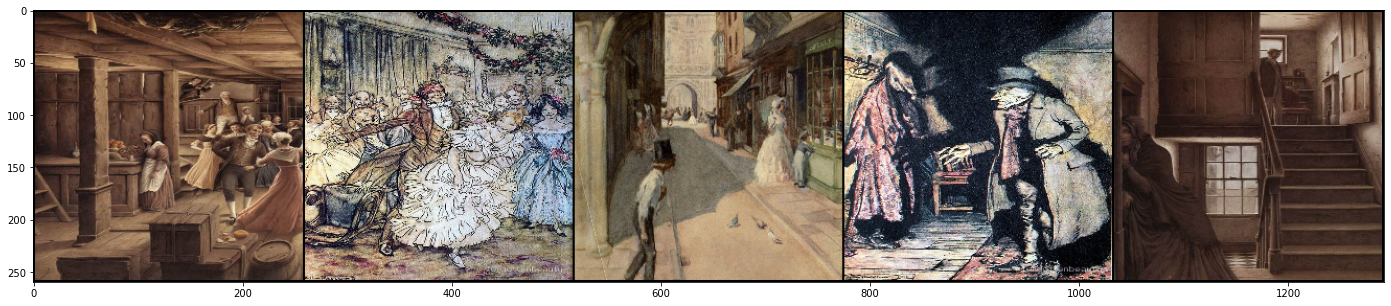

In [13]:
imgs = next(iter(dataloader))
print(imgs.shape)

imgs = rev_norm(imgs)
imgs = torchvision.utils.make_grid(imgs)
print(imgs.shape)
imgs = imgs.permute(1,2,0)
print(imgs.shape)

plt.figure(figsize=(5*batch_size, 5))
plt.imshow(imgs)


# `Lab: Solve the System of Equations with the following answers using custom dataset and dataloader`
$\mathbf{x} = [0, 0.5, 1, 1, -2]^{T}$

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
solution = np.array([[0, 0.5, 1,1,-2]]).T
num_samples = 20
inputs = np.random.randn(num_samples, 5)
targets = np.matmul (inputs, solution)


inputs = torch.FloatTensor(inputs)
targets = torch.FloatTensor(targets)

dataset = TensorDataset(inputs, targets) #tuple of inputs and targets
batch_size = 3
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last= True)


In [ ]:
class network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1, bias = False)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out
    
model = network()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


num_epochs = 2000

for epoch in range(num_epochs):    
    for input, target in train_loader:
        pred = model(input)
        loss = criterion(pred, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch[{epoch+1}/{num_epochs}]')
    print(f'    out: {np.around(pred.data.numpy()[:,0],3)}')
    print(f'    target: {np.around(target.reshape(batch_size).data.numpy(), 3)}')
    print(f'    loss: {loss.item():.6f}')
    for name, param in model.named_parameters():
        print (f'    {name}: {np.around(param.data.numpy(),3)}')
    print(f'solution:{solution.T[0]}')